## 6.2例題上限のあるカウントデータ
「N個体の実験対象に同じ処理をしたら、y個体で反応が陽性、N-y個体では陰性だった」という構造のデータは二項分布を使って説明できるかもしれない。

個体ごとに異なる体サイズや生育環境に左右されて、種子の生存確率が上下すると考えられる。

ここでは観察種子数はどの個体でも8個とする。

この例題で調べたいことは、ある個体の生存確率$q_{i}$が体サイズや施肥処理と言った説明変数によってどう変化するのかという点です。これを統計モデルのパラメータ推定やモデル選択で明らかにします。

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
%matplotlib inline

In [2]:
data = pd.read_csv('data4a.csv')

In [3]:
data.describe()

,N,y,x
count,100.0,100.000000,100.000000
mean,8.0,5.080000,9.967200
std,0.0,2.743882,1.088954
min,8.0,0.000000,7.660000
25%,8.0,3.000000,9.337500
50%,8.0,6.000000,9.965000
75%,8.0,8.000000,10.770000
max,8.0,8.000000,12.440000


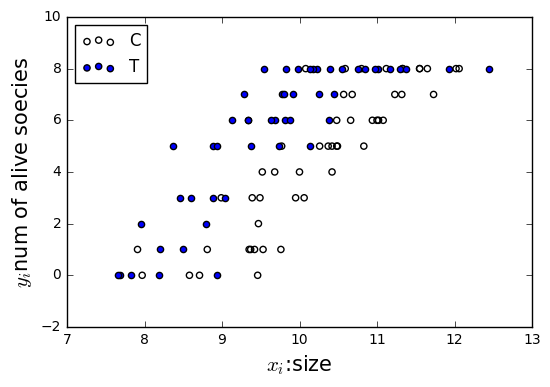

In [4]:
plt.scatter(data[data['f']=='C'].x,data[data['f']=='C'].y,facecolors='none',label='C')
plt.scatter(data[data['f']=='T'].x,data[data['f']=='T'].y,label='T')
plt.legend(loc='upper left')
plt.xlabel('$x_{i}$:size',fontsize=15)
plt.ylabel('$y_i$num of alive soecies',fontsize=15)
plt.show()

どうやら、以下のようである。
- 体サイズが大きくなると生存種子数が多くなるらしい
- 肥料をやると生存種子数が多くなるらしい。

## 6.3二項分布で表現する「あり・なし」カウントデータ
「N個のうちy個が生存していた」といった構造のカウントデータを統計モデルで表現するときには二項分布がよく使われます。

ちなみにポアソン分布では観測データを表現できません。なぜなら、ポアソン分は0以上だけど、「上限がどこにあるかわからないカウントデータ」を扱うからです。

二項分布の式は以下の通り。


$$p(y|N,q)={}_NC_yq^{y}(1-q)^{N-y}$$

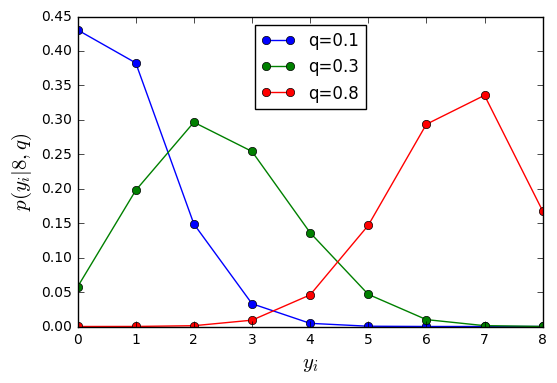

In [5]:
from scipy.stats import binom
x = np.arange(0,9)
plt.plot(x,binom.pmf(x,8.,0.1),'o-',label='q=0.1')
plt.plot(x,binom.pmf(x,8.,0.3),'o-',label='q=0.3')
plt.plot(x,binom.pmf(x,8.,0.8),'o-',label='q=0.8')
plt.legend(loc='upper center')
plt.xlabel('$y_i$',fontsize=15)
plt.ylabel('$p(y_{i}|8,q)$',fontsize=15)
plt.show()

## 6.4ロジスティック回帰とロジットリンク関数
### 6.4.1ロジットリンク関数

GLMは確率分布、リンク関数、線形予測子を指定する統計モデルであり、ロジスティック回帰では確率分布は二項分布、そしてリンク関数はロジットリンク関数を指定します。

二項分布では事象が生起する確率をパラメータとして指定する必要があり、この例題では種子の生存確率$q_{i}$がそれに該当する

この$q_{i}$は確率なので、0〜1です。ロジットリンク関数は、パラメータ$q_{i}$のこのような制約と、線形予測しをうまく関連付けるリンク関数です。

ロジスティック関数
$$q_{i}=logistic(z_{i})\frac{1}{1+exp(-z_{i})}$$

$$z_{i} = \beta_{1}+\beta_{2}x_{i}+\cdots$$

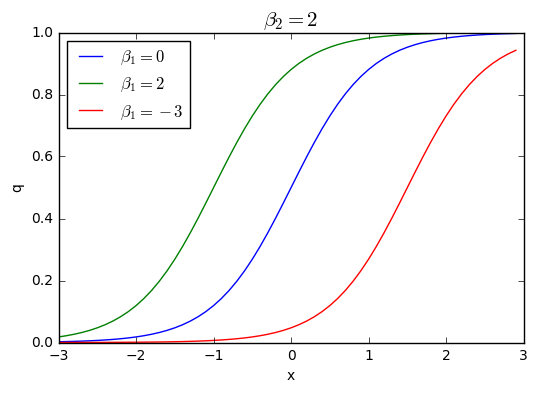

In [6]:
def logistic(beta1,beta2,x):
    return 1. / (1+np.exp(-(beta1+beta2*x)))

x = np.arange(-3,3,0.1)
plt.title('$\\beta_{2} =2$',fontsize=15)
plt.plot(x,logistic(0,2,x),label='$\\beta_{1} =0$')
plt.plot(x,logistic(2,2,x),label='$\\beta_{1} =2$')
plt.plot(x,logistic(-3,2,x),label='$\\beta_{1} =-3$')
plt.legend(loc='upper left')
plt.xlabel('x')
plt.ylabel('q')
plt.show()

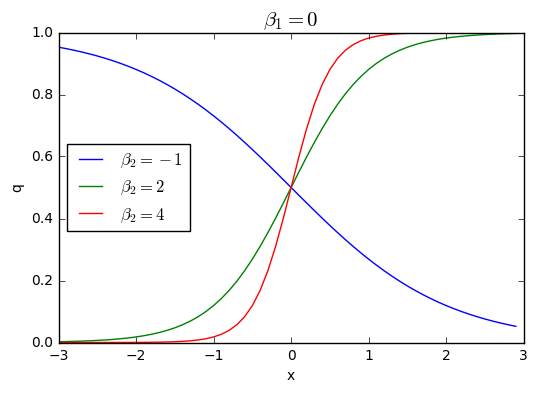

In [7]:
plt.title('$\\beta_{1} =0$',fontsize=15)
plt.plot(x,logistic(0,-1,x),label='$\\beta_{2} =-1$')
plt.plot(x,logistic(0,2,x),label='$\\beta_{2} =2$')
plt.plot(x,logistic(0,4,x),label='$\\beta_{2} =4$')
plt.legend(loc='center left')
plt.xlabel('x')
plt.ylabel('q')
plt.show()

ロジスティック関数を変形すると
$$log\frac{q_{i}}{1-q_{i}}=z_{i}$$

この左辺のことをロジット関数と言います。
$$logit(q_{i}) = log\frac{q_{i}}{1-q_{i}}$$

ロジット関数はロジスティック関数の逆関数であり、ロジスティック関数の逆がロジット関数である。

### 6.4.2パラメータ推定

対数尤度関数
$$logL({\beta_{j}}) = \sum_{i}{log\binom{N_{i}}{y_{i}}+y_{i}log(q_{i})+(N_{i}-y_{i})log(1-q_{i})}$$
ここで$q_{i}$は${\beta_{1},\beta_{2},\beta_{3}}$の関数である

In [8]:
data['f_int'] = (data['f'] == 'T').astype(int)
data.x_c = sm.add_constant(data[['x','f_int']])
data['N-y']=data['N']-data['y']
result = sm.GLM(data[['y','N-y']],data.x_c,family=sm.families.Binomial()).fit()#binominalを分布に使う場合は、非説明変数は[成功数,失敗数]とすること。
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           ['y', 'N-y']   No. Observations:                  100
Model:                            GLM   Df Residuals:                       97
Model Family:                Binomial   Df Model:                            2
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -133.11
Date:                Mon, 30 Jan 2017   Deviance:                       123.03
Time:                        17:40:34   Pearson chi2:                     109.
No. Iterations:                     8                                         
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        -19.5361      1.414    -13.818      0.000       -22.307   -16.765
x              1.9524      0.139     14.059      0.000         1.680     2.225
f_int          2.0215      0.231      8.740      0.000         1.568     2.475
==============================================================================
"""

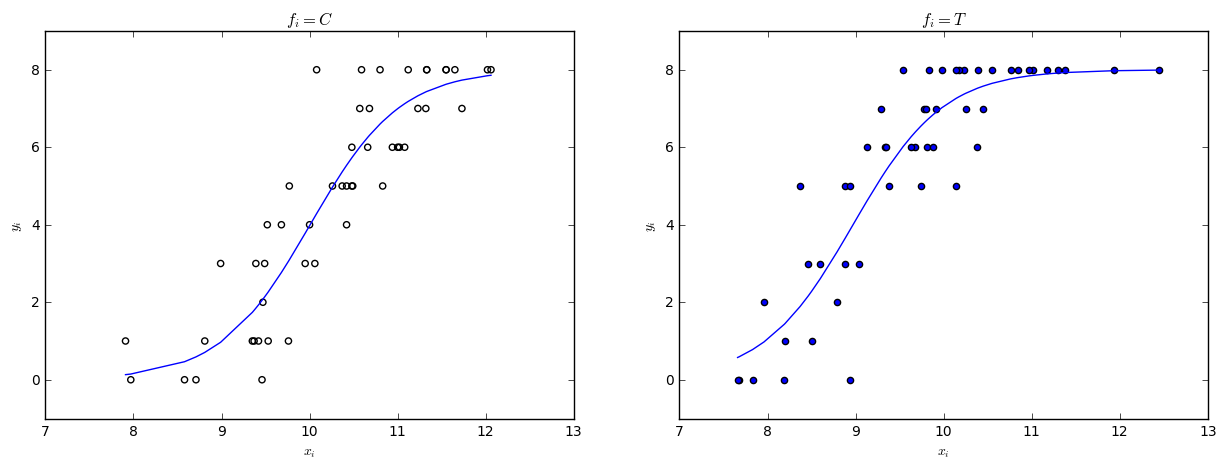

In [9]:
def logistic(x):
    return 1. / (1+np.exp(-x))

data['predict'] = result.predict()#返ってくるのは規格化された値
fig=plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.scatter(data[data['f']=='C'].x,data[data['f']=='C'].y,facecolors='none')
ax1.plot(data[data['f']=='C'].sort_values('x').x,data[data['f']=='C'].sort_values('x').predict*8.)
ax2.scatter(data[data['f']=='T'].x,data[data['f']=='T'].y)
ax2.plot(data[data['f']=='T'].sort_values('x').x,data[data['f']=='T'].sort_values('x').predict*8.)
ax1.set(xlabel='$x_{i}$',ylabel='$y_{i}$',title='$f_{i}=C$')
ax2.set(xlabel='$x_{i}$',ylabel='$y_{i}$',title='$f_{i}=T$')
plt.show()

### 6.4.3　ロジットリンク関数の意味・解釈
$$logit(q_{i})=log \frac{q_{i}}{1-q_{i}}$$
$$\frac{q_{i}}{1-q{i}}=exp(\beta_{1} + \beta_{2}x_{i} + \beta_{3}f_{i})$$
$$=exp(\beta_{1})exp(\beta_{2}x_{i})exp(\beta_{3}f_{i})$$

この左辺はオッズと呼ばれる量で、この場合だと（生存する確率）/（生存しない確率）という比であり、$q_{i}=0.5$の時にオッズは1倍、0.8の時はオッズは4倍であると言ったりします。先ほどの推定結果を代入すると以下のようになる。
$$\frac{q_{i}}{1-q_{i}}\propto exp(1.95x_{i})exp(2.02f_{i})$$

今個体iの大きさが１単位増加したら生存確率のオッズはどうなるでしょうか？
$$\frac{q_{i}}{1-q_{i}}\propto exp(1.95x_{i}+1)exp(2.02f_{i})$$
$$\propto exp(1.95x_{i})exp(1.95)exp(2.02f_{i})$$

生存のオッズは$exp(1.95)$なので7倍くらい増加します。また、同様に施肥処理ありだたオッズが$exp(2.02)$倍なので7.5倍くらいです。

このように、ロジットリンク関数で生存確率を定義すると、様々な要因と応答事象のオッズの解釈が簡単になります。

オッズの対数を取ると以下のようになる。

$$log \frac{q_{i}}{1-q_{i}} = \beta_{1}+\beta_{2}x_{i}+\beta_{3}f_{i}$$

右辺は線形予測しである。

オッズとリスクについて考えてみる。よく世間で「生活習慣Xによってナントカ病の発病リスクが7倍になる」と言った報道がなされます。ここで言うリスクとは近似的にはオッズ比のことです。

### 6.4.4 ロジスティック回帰のモデル選択
AICのモデル選択によって、良い予測をするモデルを選択する。

In [10]:
data.head()

,N,y,x,f,f_int,N-y,predict
0,8,1,9.76,C,0,7,0.382115
1,8,6,10.48,C,0,2,0.716091
2,8,5,10.83,C,0,3,0.833202
3,8,6,10.94,C,0,2,0.860957
4,8,1,9.37,C,0,7,0.224085


In [11]:
#フルモデル
summary = []
llh = np.sum(stats.binom.logpmf(data.y,8,data.y/8.))
deviance = -2*llh
residual_deviance = 0.
aic = -2*(llh - 100)

summary.append(['full',100,llh,deviance,residual_deviance,aic])

In [12]:
#一定モデル
data.x_c = sm.add_constant(data.x)
model = sm.GLM(data[['y','N-y']],data.x_c['const'],family=sm.families.Binomial())
result = model.fit()
summary.append(['const',result.df_model+1,result.llf,-2*result.llf,result.deviance,result.aic])

In [13]:
import itertools
column = ['f_int','x']
for i in range(2):
    for a in itertools.combinations(column,i+1):
        a_array = np.array(a)
        data.x_c = sm.add_constant(data[a_array])
        model = sm.GLM(data[['y','N-y']],data.x_c,family=sm.families.Binomial())
        res = model.fit()
        summary.append([a_array,res.df_model+1,res.llf,-2*res.llf,res.deviance,res.aic])
result_table = pd.DataFrame(summary,columns=['model','k','logL','deviance','residual deviance','AIC'])


In [14]:
result_table

,model,k,logL,deviance,residual deviance,AIC
0,full,100,-71.588619,143.177239,0.000000,343.177239
1,const,1,-321.204671,642.409342,499.232103,644.409342
2,[f_int],2,-316.879877,633.759753,490.582514,637.759753
3,[x],2,-180.172722,360.345443,217.168204,364.345443
4,"[f_int, x]",3,-133.105565,266.211129,123.033890,272.211129


x+fのモデルがAICの観点から最良のモデルとなりました。

## 6.5交互作用項の入った線形予測子
ここまで使ってきた線形予測子に交互作用項を追加してみます。
$$logit(q_{i})=\beta_{1}+\beta_{2}x_{i}+\beta_{3}f_{i}+\beta_{4}x_{i}f_{i}$$

交互作用が大きな影響を持つ場合、平均種子数のサイズ$x_{i}$依存性は施肥処理$f_{i}$によって大きく変わります。

In [15]:
data['x*f'] = data['x'] * data['f_int']

In [16]:
data.x_c = sm.add_constant(data[['x','f_int','x*f']])
result = sm.GLM(data[['y','N-y']],data.x_c,family=sm.families.Binomial()).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           ['y', 'N-y']   No. Observations:                  100
Model:                            GLM   Df Residuals:                       96
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -132.81
Date:                Mon, 30 Jan 2017   Deviance:                       122.43
Time:                        17:40:35   Pearson chi2:                     109.
No. Iterations:                     8                                         
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        -18.5233      1.886     -9.821      0.000       -22.220   -14.827
x              1.8525      0.186      9.983      0.000         1.489     2.216
f_int         -0.0638      2.704     -0.024      0.981        -5.363     5.235
x*f            0.2163      0.280      0.772      0.440        -0.333     0.765
==============================================================================
"""

In [17]:
result.aic

273.61059672597395

交互作用なしのAIC：272.2 交互作用ありのAIC:273.6


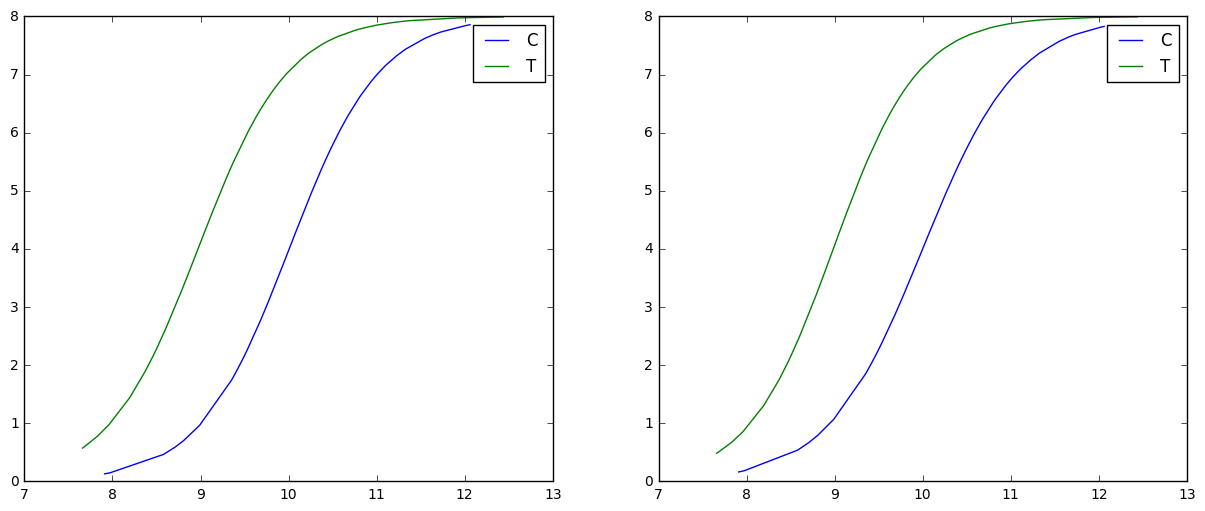

In [18]:
fig,ax = plt.subplots(1,2,figsize=(15,6))
variables = [['x','f_int'],['x','f_int','x*f']]
aic = []
for i,var in enumerate(variables):
    data.x_c = sm.add_constant(data[var])
    model = sm.GLM(data[['y','N-y']],data.x_c,family=sm.families.Binomial())
    result = model.fit()
    data['predict'] = result.predict()
    ax[i].plot(data[data['f']=='C'].sort_values('x').x,data[data['f']=='C'].sort_values('x').predict*8.,label='C')
    ax[i].plot(data[data['f']=='T'].sort_values('x').x,data[data['f']=='T'].sort_values('x').predict*8.,label='T')
    ax[i].legend()
    aic.append(result.aic)
print('交互作用なしのAIC：%.1f 交互作用ありのAIC:%.1f'%(aic[0],aic[1]))

グラフはほとんど変わらないが、AICは交互作用がある場合では悪化する。この例題に関して言えば、交互作用項を追加してもモデルがわかりにくくなっただけで、予測能力は何も改善されなかったと結論できる。

現実のデータにGLMを当てはめた場合、交互作用項を多数含んだ統計モデルのAICが最良になることがよくあります。しかし、これは交互作用項の効果を課題推定している、ニセの交互作用でつじつま合わせしている可能性もあります。


現実のデータでは、説明できない、個体差、場所差によるばらつきが発生します。それらを考慮しないGLMを当てはめた場合、過度に複雑なモデルが選ばれる可能性があります。

## 6.6割算値の統計モデリングはやめよう
二項分布とロジットリンク関数を使ったロジスティック回帰を使う利点のひとつは「種子が生存している確率」、「処理に応答する確率」と言った何かの生起確率を推定する時に、（観測値）／（観測値）と言った割算値を作り出す必要がなくなるということです。

観測値同士の割算や、対数などで変換した観測値を統計モデルの応答変数にするのは、不必要であるばかりでなく、場合によっては間違った結果を導きかねないものです。生じる問題としては以下の通り。
- 情報が失われる。

例えば、３割バッターについて、1000打数なのか10打数なのかは全然違う

- 変換された値の分布はどうなる？

分子、分母にそれぞれ誤差が入った数値同士を割り算して得られた割算値はどんな確率分布に従うのでしょうか？

### 6.6.1割算いらずのオフセット項わざ
モデリングの際、こういった割算値を使わなければ行けないという状況はほとんど無い。
ロジスティック回帰の統計モデルのように「N個のうちy個で事象が生じる確率」を明示的にあつかう二項分布を使うことで、割算値の使用は解決できます。

調査の概要は以下の通り
- 森林のあちこちに調査地100箇所を設定した
- 調査地iごとにその面積Aiが異なる
- 調査地iの明るさxiを測っている
- 調査値iにおける植物個体数yiを記録した。
- （解析の目的）調査値iにおける植物個体の「人口密度」が「明るさ」xiにどう影響されているか知りたい
ここで言う人口密度は個体数／面積と言った単位面積あたりの個体数と言った概念だが、こういった数量を扱うからと言って、観測値yiとAiで割算値をこしらえる必要は無い。

面積がAiである調査値iにおける人口密度は$\lambda_{i}$を平均個体数だとすると

$$\frac{\lambda_{i}}{A_{i}}=dense \  of \ population$$

人口密度は正の量なので、指数関数と明るさxiの依存性を組み合わせて
$$\lambda_{i}=A_{i}\times (dens\ of\ population)=A_{i}exp(\beta_{1}+\beta_{2}x_{i})$$

とモデル化して良いでしょう。これを変形すると
$$\lambda_{i}=exp(\beta_{1}+\beta_{2}x_{i}+logA_{i})$$

となり、$z_{i}=\beta_{1}+\beta_{2}x_{i}+logA_{i}$を線形予測子とする対数リンク関数・ポアソン分布のGLMになります。

ちなみに、このように線形予測子の中でパラメータがつかない項をオフセット項と呼びます。

In [19]:
data = pd.read_csv('data4b.csv')

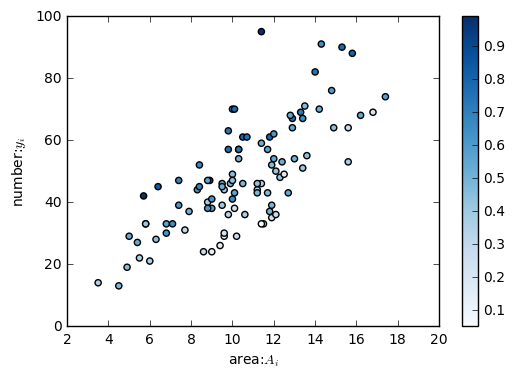

In [20]:
plt.scatter(data.A,data.y,c=data.x,cmap='Blues')
plt.xlabel('area:$A_{i}$')
plt.ylabel('number:$y_{i}$')
plt.colorbar()
plt.show()

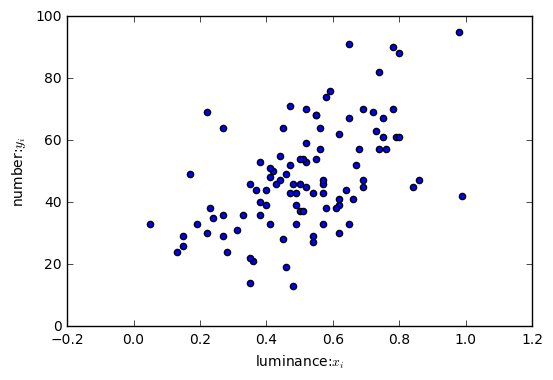

In [21]:
plt.scatter(data.x,data.y)
plt.xlabel('luminance:$x_{i}$')
plt.ylabel('number:$y_{i}$')
plt.show()

In [22]:
data.x_c = sm.add_constant(data['x'])
result = sm.GLM(data.y,data.x_c,offset=np.log(data.A),family=sm.families.Poisson()).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -323.17
Date:                Mon, 30 Jan 2017   Deviance:                       81.608
Time:                        17:40:36   Pearson chi2:                     81.5
No. Iterations:                     7                                         
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.9731      0.045     21.600      0.000         0.885     1.061
x              1.0383      0.078     13.364      0.000         0.886     1.191
==============================================================================
"""

In [23]:
data['prediction'] = result.predict()

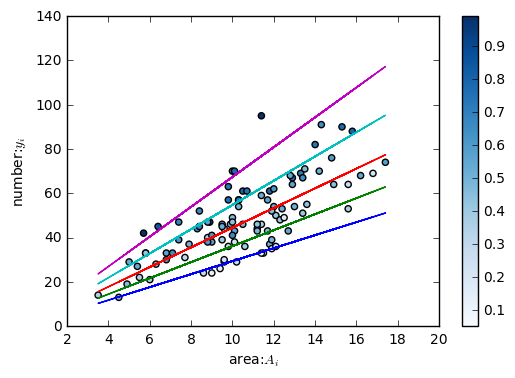

In [24]:
plt.scatter(data.A,data.y,c=data.x,cmap='Blues')
plt.xlabel('area:$A_{i}$')
plt.ylabel('number:$y_{i}$')
plt.colorbar()
plt.plot(data.A,data.A*np.exp(0.9731+1.0383*0.1))
plt.plot(data.A,data.A*np.exp(0.9731+1.0383*0.3))
plt.plot(data.A,data.A*np.exp(0.9731+1.0383*0.5))
plt.plot(data.A,data.A*np.exp(0.9731+1.0383*0.7))
plt.plot(data.A,data.A*np.exp(0.9731+1.0383*0.9))
plt.show()

## ガンマ分布のGLM
ガンマ分布は確率変数の取りうる範囲が0以上の連続確率分布です。確率密度関数は以下の通り。
$$p(y|s,r)=\frac{r^{s}}{\Gamma(s)}y^{s-1}exp(-ry)$$

sはシェイプパラメータ、rはレイトパラメータと呼ばれる。平均は$s/r$、分散は$s/r^{2}$となる。

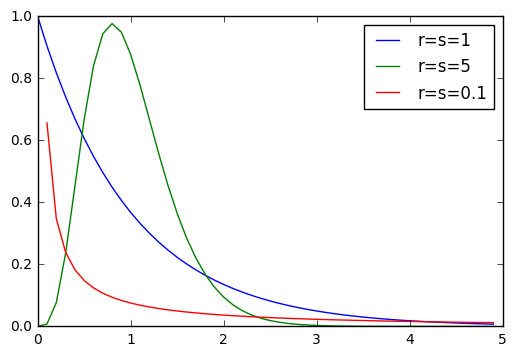

In [25]:
#ガンマ分布の表示
x = np.arange(0,5,0.1)

plt.plot(x,stats.gamma.pdf(x,a=1,scale=1),label='r=s=1')
plt.plot(x,stats.gamma.pdf(x,a=5,scale=1/5.),label='r=s=5')
plt.plot(x,stats.gamma.pdf(x,a=0.1,scale=1/0.1),label='r=s=0.1')
plt.legend(loc='upper right')
plt.show()

例題は、架空植物50個体の葉の重量と花の重量の関係を調べる。葉重量をxi、花重量をyi。応答変数をyi、説明変数をxiとして、両者の関係をGLMで記述する。

ここでは、ある個体の花の重量yiが平均μiのガンマ分布に従っていることにします。応答変数yiは連続値で正しか取らないので、ガウス分布よりもガンマ分布で説明したほうが良さそうです。

平均花重量μiが葉重量の単調増加関数で、さらに「何らかの」生物学的理由があって以下のように書き下せるとする。
$$\mu_{i}=Ax^{b}_{i}$$
$A=exp(a)$とおいて、全体を指数関数でまとめると。
$$\mu_{i}=exp(a)x^{b}_{i}=exp(a+blogx_{i})$$
この両辺の対数を取ると
$$log\mu_{i}=a+blogx_{i}$$

右辺が線形予測し$a+blogx_{i}$と対数リンク関数を使って平均$\mu_{i}$が与えられました。

GLMによる推定では、平均を決める線形予測子とリンク関数だけ決めれば良いため、平均・分散をshape/rateのパラメータにどう対応付けるかと言ったことを気にする必要はない。

In [26]:
import readline
import rpy2.robjects as robjects

robjects.r['load']('d.RData')
data = pd.DataFrame(np.array(robjects.r['d']).T,columns=['x','y'])

In [27]:
data['logx'] = np.log(data.x)
data.x_c = sm.add_constant(data.logx)

In [29]:
model = sm.GLM(data.y,data.x_c,family=sm.families.Gamma(link=sm.families.links.log))
result = model.fit()
print result.summary()

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                   50
Model:                            GLM   Df Residuals:                       48
Model Family:                   Gamma   Df Model:                            1
Link Function:                    log   Scale:                  0.325084605974
Method:                          IRLS   Log-Likelihood:                 58.471
Date:              月, 30  1月 2017   Deviance:                       17.251
Time:                        17:40:53   Pearson chi2:                     15.6
No. Iterations:                    12                                         
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -1.0403      0.119     -8.759      0.000        -1.273    -0.808
logx           0.6832      0.068      9.992      0.000  

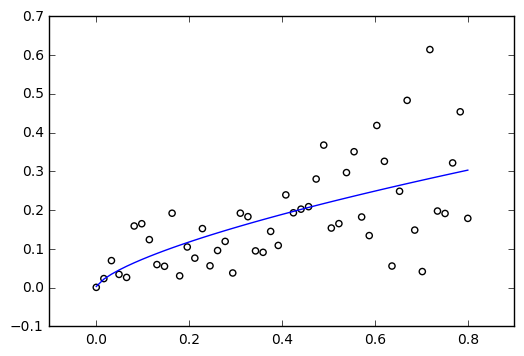

In [30]:
data['prediction'] = result.predict()

plt.scatter(data.x,data.y,facecolor='none')
plt.plot(data.sort_values('x').x,data.sort_values('x').prediction)
plt.show()